In [18]:
# Initialize arrays to hold the normalized data, means, and standard deviations
norm_pos = np.empty_like(skel_pos)
means_per_joint_axis_skel_pos = np.empty((skel_pos.shape[1], skel_pos.shape[2]))
stds_per_joint_axis_skel_pos = np.empty((skel_pos.shape[1], skel_pos.shape[2]))

norm_vel= np.empty_like(skel_vel)
means_per_joint_axis_vel = np.empty((skel_vel.shape[1], skel_vel.shape[2]))
stds_per_joint_axis_vel = np.empty((skel_vel.shape[1], skel_vel.shape[2]))

norm_acc = np.empty_like(skel_acc)
means_per_joint_axis_acc = np.empty((skel_acc.shape[1], skel_acc.shape[2]))
stds_per_joint_axis_acc = np.empty((skel_acc.shape[1], skel_acc.shape[2]))

# Function to normalize data
def normalize_data(data, masks, means_per_joint_axis, stds_per_joint_axis, normalized_data):
    for joint in range(data.shape[1]):  # For each joint
        for axis in range(data.shape[2]):  # For each axis (x, y, z)
            joint_axis_data = data[:, joint, axis]
            mask_for_joint = masks[:, joint]

            # Select valid data based on the mask
            valid_data = joint_axis_data[mask_for_joint == 1]

            # Calculate mean and standard deviation for valid data
            mean = np.mean(valid_data) if valid_data.size > 0 else np.nan
            std = np.std(valid_data) if valid_data.size > 0 else np.nan

            # Store the calculated means and standard deviations
            means_per_joint_axis[joint, axis] = mean
            stds_per_joint_axis[joint, axis] = std

            # Normalize the data, avoiding division by zero
            if std > 0:
                normalized_values = (joint_axis_data - mean) / std
            else:
                normalized_values = joint_axis_data  # Keep original values if std is 0 or nan

            # Apply normalization only where data is present
            normalized_data[:, joint, axis] = np.where(mask_for_joint == 1, normalized_values, np.nan)
            
    return normalized_data, means_per_joint_axis, stds_per_joint_axis

# Normalize skel_pos
norm_pos, means_pos, stds_pos= normalize_data(skel_pos, masks, means_per_joint_axis_skel_pos, stds_per_joint_axis_skel_pos, norm_pos)

# Normalize skel_vel
norm_vel, means_vel, stds_vel=normalize_data(skel_vel, masks, means_per_joint_axis_vel, stds_per_joint_axis_vel, norm_vel)

# Normalize skell_acc
norm_acc, means_acc, stds_acc=normalize_data(skel_acc, masks, means_per_joint_axis_acc, stds_per_joint_axis_acc, norm_acc)


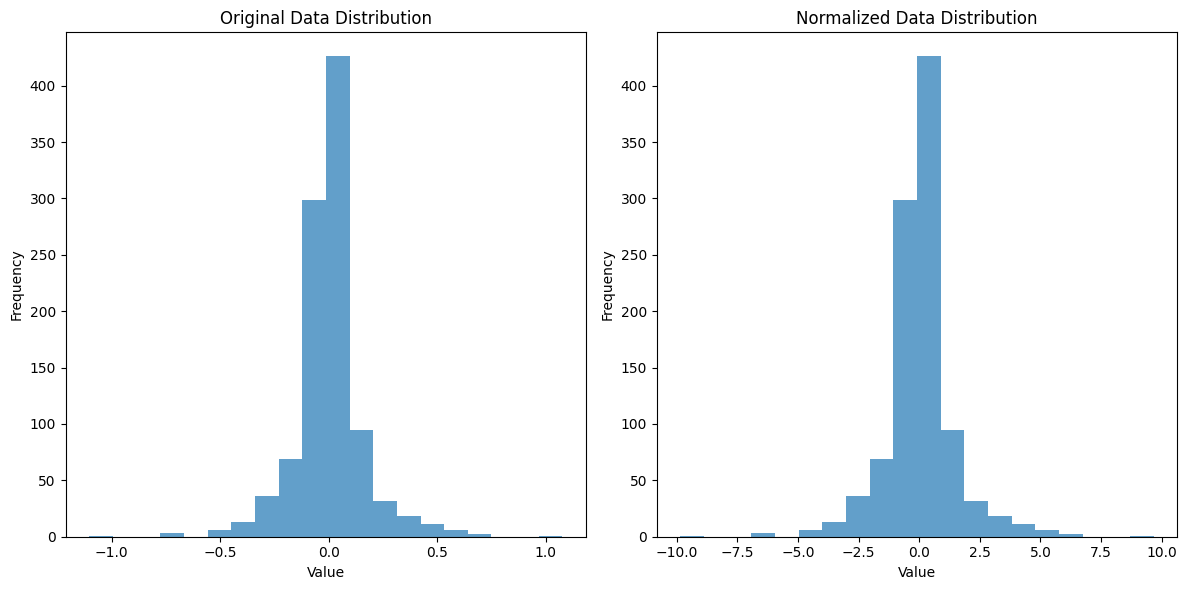

Median of normalized data: 1.951563910473908e-18
Data points within [-1, 1] (IQR): 724 out of 1018


/tmp/ipykernel_19602/1482451666.py:11: RuntimeWarning: Mean of empty slice
  means_after_normalization = np.nanmean(normalized_data, axis=0)


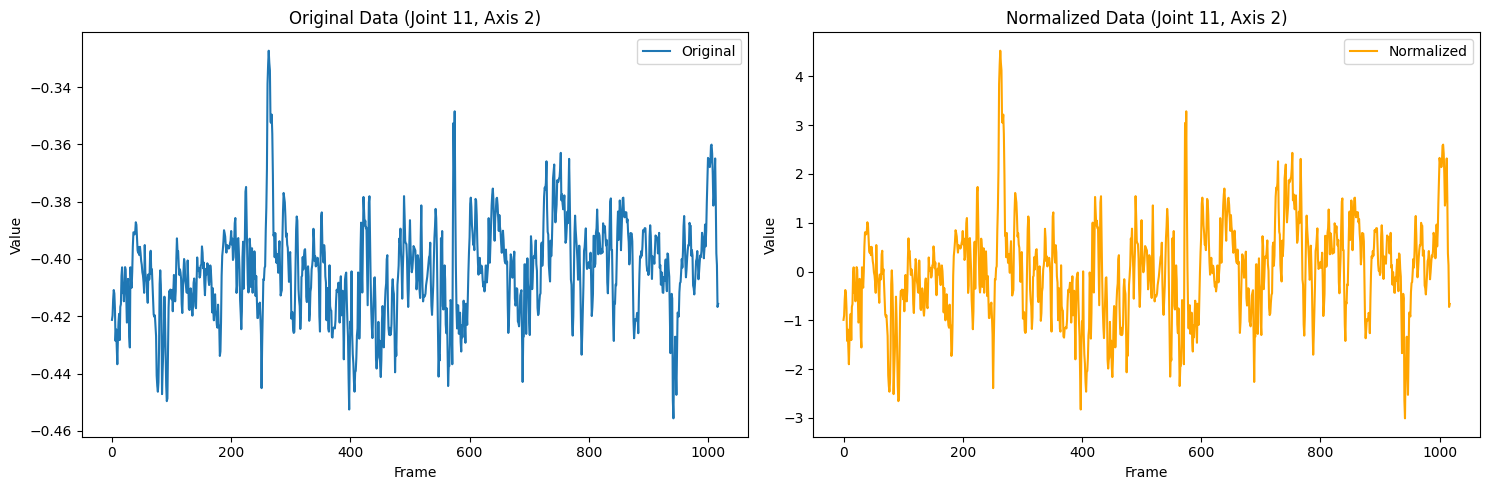

Means after normalization (should be close to 0):
 [[-1.28449968e-15 -3.59895479e-17  9.28530337e-16]
 [-1.18907285e-15 -4.72008374e-16 -3.66220915e-16]
 [ 9.06992051e-16  8.25174630e-16 -3.31644947e-16]
 [ 1.27381188e-16  1.65770039e-16  1.42758540e-16]
 [-1.32746430e-16 -2.72916181e-16  5.37099044e-17]
 [-6.52283292e-16  4.40381196e-16  3.17580496e-16]
 [ 1.71937194e-16 -8.19403542e-16  3.47367715e-16]
 [-4.08368032e-16 -1.62288808e-16  2.78382635e-16]
 [ 5.65799317e-16 -1.70786764e-16  3.01003492e-17]
 [-1.25455202e-15 -7.19662425e-17 -3.14827529e-16]
 [            nan             nan             nan]
 [ 1.18411066e-16  1.35451571e-16  1.30707495e-15]
 [-7.48667375e-16  3.96957100e-17 -7.68777076e-16]
 [            nan             nan             nan]
 [-6.20765173e-16 -8.28850195e-18  1.03377250e-15]
 [ 6.16402803e-16 -2.48655059e-16  2.89225094e-16]
 [ 5.53366565e-16  4.32092694e-16 -5.68634858e-16]
 [ 4.59580694e-17  3.34874247e-16 -1.28701152e-15]]
Standard deviations after norm

In [20]:
#Testing Normalisation

data=skel_pos
normalized_data=norm_pos
means_per_joint_axis=means_pos
stds_per_joint_axis=stds_pos
# Assuming 'normalized_data' contains your normalized data
# 'means_per_joint_axis' and 'stds_per_joint_axis' are the means and standard deviations used for normalization

# Compute the means and standard deviations of the normalized data (excluding NaNs)
means_after_normalization = np.nanmean(normalized_data, axis=0)
stds_after_normalization = np.nanstd(normalized_data, axis=0)

# Choose a joint and an axis for visualization (e.g., joint 0, x-axis)
joint = 11
axis = 2
# Visualization: Compare original and normalized data for the selected joint-axis
plt.figure(figsize=(15, 5))

# Original data
plt.subplot(1, 2, 1)
plt.plot(data[:, joint, axis], label='Original')
plt.title(f'Original Data (Joint {joint}, Axis {axis})')
plt.xlabel('Frame')
plt.ylabel('Value')
plt.legend()

# Normalized data
plt.subplot(1, 2, 2)
plt.plot(normalized_data[:, joint, axis], label='Normalized', color='orange')
plt.title(f'Normalized Data (Joint {joint}, Axis {axis})')
plt.xlabel('Frame')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

# Assuming 'masks' is your mask array
mask_for_joint_axis = masks[:, joint]

# Manual comparison of normalization for the first few values
sample_values = data[:60, joint, axis]

# Select valid data based on the mask
valid_sample_values = sample_values[mask_for_joint_axis[:60] == 1]
valid_means = means_per_joint_axis[joint, axis]
valid_stds = stds_per_joint_axis[joint, axis]

# Compute manual normalization for valid data
manual_normalized_values = (valid_sample_values - valid_means) / valid_stds if valid_stds > 0 else valid_sample_values

normalized_values_from_code = normalized_data[:60, joint, axis]

# Select valid normalized values from code
valid_normalized_values_from_code = normalized_values_from_code[mask_for_joint_axis[:60] == 1]

# Print results for comparison
print("Means after normalization (should be close to 0):\n", means_after_normalization)
print("Standard deviations after normalization (should be close to 1):\n", stds_after_normalization)
print("Manual normalized values:\n", manual_normalized_values)
print("Normalized values from code:\n", valid_normalized_values_from_code)